# **Tratativa auxiliar dos dados fornecido pela FIAP**

Para este projeto, foram disponibilizadas diversas bases, abrangendo os anos de 2020, 2021 e 2022, contendo informações sobre alunos, índices calculados, grade, visão dos professores, etc.

Como uma forma de auxiliar numa primeira tratativa de dados, a FIAP disponibilizou um notebook que tratava um CSV compilado dos três anos com as principais informações desses anos, como alunos, notas e critérios.

Este primeiro capítulo do notebook foca-se em utilizar o notebook fornecido pela FIAP, além de linhas extras de códigos inseridas para gerar consultas, tirar conclusões e afins, e poder realizar as demais demandas do projeto.

    Obs: As linhas serão todas comentadas e serão identificadas as linhas de código extras que foram criadas

In [ ]:
# Primeiro importamos as bibliotecas que serão utilizadas para a tratativa dos dados e alguns plots iniciais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Após importar as bibliotecas, iremos agora chamar a fonte de dados e atribuí-la a um DataFrame

file_path = './PEDE_PASSOS_DATASET_FIAP.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(file_path, delimiter=';')

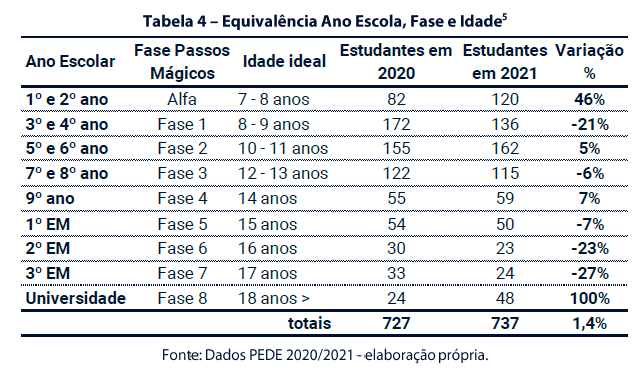

## Analisando os dados 🔎

In [2]:
# Tem algumas inconsistências de nomenclatura em relação ao dataset e o PDF de dicionário, mas acho que tudo bem...
# Reparei também que temos colunas faltando, sendo elas: **REC_PSICO_2021**, **REC_PSICO_2022** e **INSTITUICAO_ENSINO_ALUNO_2022**.

    Observação FIAP:
**Essa linha demonstra que o Aluno foi ingressado em 2022, e todas as outras colunas são nulas. Uma recomendação seria criar para cada ano um dataset separado para início das análises.** 🤔

In [3]:
df.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual

In [4]:
pd.DataFrame(df.loc[df['NOME'] == 'ALUNO-2']).transpose().T

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.2,9.433333,NaN,2.0,5.625,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO_2020  728 non-null    object 
 1   NOME                           1349 non-null   object 
 2   IDADE_ALUNO_2020               728 non-null    object 
 3   ANOS_PM_2020                   728 non-null    object 
 4   FASE_TURMA_2020                728 non-null    object 
 5   PONTO_VIRADA_2020              702 non-null    object 
 6   INDE_2020                      728 non-null    object 
 7   INDE_CONCEITO_2020             728 non-null    object 
 8   PEDRA_2020                     728 non-null    object 
 9   DESTAQUE_IEG_2020              728 non-null    object 
 10  DESTAQUE_IDA_2020              728 non-null    object 
 11  DESTAQUE_IPV_2020              703 non-null    object 
 12  IAA_2020                       728 non-null    o

In [ ]:
# Para melhor visualização dos dados e para tratar com as casas decimais relevantes para o nível de precisão de análise, arredondamos os dados para 2 casas decimais
df.describe().round(2)

,FASE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,IPV_2021,IAN_2021,DEFASAGEM_2021,FASE_2022,ANO_INGRESSO_2022,INDE_2022,CG_2022,CF_2022,CT_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,IPV_2022,IAN_2022
count,686.00,686.00,686.00,686.00,686.00,686.00,686.00,686.00,686.00,862.00,862.00,862.00,862.00,862.00,862.00,862.00,862.00,862.00,862.00,860.00,860.00,285.00,862.00,862.00,862.00,862.00
mean,2.28,8.15,6.82,6.84,5.43,7.58,7.41,6.90,-0.75,2.11,2020.50,7.03,431.50,75.40,6.62,8.26,7.88,6.90,6.07,5.80,6.31,5.84,3.06,6.30,7.25,6.42
std,1.80,2.19,2.46,1.46,2.14,1.07,1.63,2.48,0.79,1.80,1.79,1.03,248.98,52.31,3.99,2.08,1.65,1.07,2.06,2.42,2.09,2.99,0.78,1.14,1.10,2.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.50,-4.00,0.00,2016.00,3.03,1.00,1.00,1.00,0.00,0.00,2.50,0.00,0.00,0.00,0.00,2.00,0.00,2.50,2.50
25%,1.00,7.90,5.30,6.90,4.10,7.30,6.60,5.00,-1.00,1.00,2019.00,6.47,216.25,30.00,3.00,7.92,7.00,6.25,4.75,4.32,5.17,3.50,2.00,5.62,6.72,5.00
50%,2.00,8.80,7.20,7.50,5.85,7.70,7.70,5.00,-1.00,2.00,2021.00,7.19,431.50,66.50,6.00,8.75,8.31,7.50,6.33,6.00,6.65,6.27,3.00,6.25,7.33,5.00
75%,3.00,9.50,8.80,7.50,6.90,8.10,8.60,10.00,0.00,3.00,2022.00,7.75,646.75,118.00,9.75,9.50,9.10,7.50,7.58,7.83,7.83,8.50,4.00,7.03,7.92,10.00
max,7.00,10.00,10.00,8.80,9.50,10.00,10.00,10.00,3.00,7.00,2022.00,9.44,862.00,192.00,18.00,10.00,10.00,10.00,9.92,10.00,10.00,10.00,4.00,9.22,10.00,10.00


In [7]:
df.isnull().sum()

INSTITUICAO_ENSINO_ALUNO_2020    621
NOME                               0
IDADE_ALUNO_2020                 621
ANOS_PM_2020                     621
FASE_TURMA_2020                  621
                                ... 
INDICADO_BOLSA_2022              487
PONTO_VIRADA_2022                487
IPV_2022                         487
IAN_2022                         487
NIVEL_IDEAL_2022                 487
Length: 69, dtype: int64

## Tivemos adição de colunas novas no dataset ao longo do tempo 🤔

In [8]:
len(df.columns[df.columns.str.contains('2020')])

18

In [ ]:
#df.columns[df.columns.str.contains('2020')]

In [ ]:
# Sabendo que a quantidade de colunas é diferente para cada ano, comparando a base, os relatórios e dicionários, puxamos quais as respectivas colunas para ter uma melhor noção
#de com o que estamos lidando e para ver se, de repente, alguma coluna possa ter nomes diferentes, mas ter o mesmo tipo de informação entre cada ano.
# Portanto, para isso, realizamos o procedimento abaixo para identificar as colunas de cada ano (2020, 2021, 2022), repetindo a seguinte estrutura 3x

col_2020 = df.columns[df.columns.str.contains("2020")]
col_2020_df = pd.DataFrame({"2020":col_2020})
col_2020_df

,2020
0,INSTITUICAO_ENSINO_ALUNO_2020
1,IDADE_ALUNO_2020
2,ANOS_PM_2020
3,FASE_TURMA_2020
4,PONTO_VIRADA_2020
5,INDE_2020
6,INDE_CONCEITO_2020
7,PEDRA_2020
8,DESTAQUE_IEG_2020
9,DESTAQUE_IDA_2020


In [11]:
len(df.columns[df.columns.str.contains('2021')])

20

In [12]:
#df.columns[df.columns.str.contains('2021')]

In [13]:
col_2021 = df.columns[df.columns.str.contains("2021")]
col_2021_df = pd.DataFrame({"2021":col_2021})
col_2021_df

,2021
0,FASE_2021
1,TURMA_2021
2,INSTITUICAO_ENSINO_ALUNO_2021
3,SINALIZADOR_INGRESSANTE_2021
4,PEDRA_2021
5,INDE_2021
6,IAA_2021
7,IEG_2021
8,IPS_2021
9,IDA_2021


In [14]:
len(df.columns[df.columns.str.contains('2022')])

30

In [15]:
#df.columns[df.columns.str.contains('2022')]

In [16]:
col_2022 = df.columns[df.columns.str.contains("2022")]
col_2022_df = pd.DataFrame({"2022":col_2022})
col_2022_df

,2022
0,FASE_2022
1,TURMA_2022
2,ANO_INGRESSO_2022
3,BOLSISTA_2022
4,INDE_2022
5,CG_2022
6,CF_2022
7,CT_2022
8,PEDRA_2022
9,DESTAQUE_IEG_2022


In [ ]:
# Tendo identificado os nomes das colunas particulares de cada ano, as agrupei em uma mesma tabela para uma comparação mais direta e para podermos exportar para o excel, para tratativas mais rápidas
#como edição, marcação, e afins

nomes_colunas = pd.concat([col_2022_df,col_2021_df,col_2020_df], axis = 1)
nomes_colunas

,2022,2021,2020
0,FASE_2022,FASE_2021,INSTITUICAO_ENSINO_ALUNO_2020
1,TURMA_2022,TURMA_2021,IDADE_ALUNO_2020
2,ANO_INGRESSO_2022,INSTITUICAO_ENSINO_ALUNO_2021,ANOS_PM_2020
3,BOLSISTA_2022,SINALIZADOR_INGRESSANTE_2021,FASE_TURMA_2020
4,INDE_2022,PEDRA_2021,PONTO_VIRADA_2020
5,CG_2022,INDE_2021,INDE_2020
6,CF_2022,IAA_2021,INDE_CONCEITO_2020
7,CT_2022,IEG_2021,PEDRA_2020
8,PEDRA_2022,IPS_2021,DESTAQUE_IEG_2020
9,DESTAQUE_IEG_2022,IDA_2021,DESTAQUE_IDA_2020


## Funções reutilizáveis 🤓

In [18]:
def filter_columns(df, filters: list): # adiciono no array o padrão que existe nas colunas e que não quero que tenha na saída final
    selected_columns = [True] * len(df.columns)  # Inicializa todas as colunas como True
    for index, column in enumerate(df.columns):
        if any(filter in column for filter in filters): selected_columns[index] = False
    return df[df.columns[selected_columns]]

In [19]:
def cleaning_dataset(df):
  _df = df.dropna(subset=df.columns.difference(['NOME']), how='all') # executa o dropna para todas as colunas sem visualizar a coluna NOME
  _df = _df[~_df.isna().all(axis=1)] # remove linhas com apenas NaN, se tiver algum dado na linha não remove
  return _df

In [20]:
def plot_exact_counter(size, x, y, df) -> None:
  import matplotlib.pyplot as plt
  import seaborn as sns
  import pandas as pd

  plt.figure(figsize=size)
  barplot = plt.bar(y.index, y.values)
  plt.xlabel(x)
  plt.ylabel('Count')

  for index, value in enumerate(y.values):
        plt.text(index, value, round(value, 2), color='black', ha="center")

  plt.show()

In [21]:
def analyse_corr(df):
  import seaborn as sns
  import matplotlib.pyplot as plt

  df = df.apply(pd.to_numeric, errors='coerce')

  corr_matrix = df.corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
  plt.show()

## DF - 2020




In [22]:
df_2020 = filter_columns(df, ['2021', '2022'])
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10


In [ ]:
# Para entender melhor o tipo de informação em algumas colunas e sua possível relevância para análises e projeções, puxamos os valores únicos da coluna de instituição para ver o conteúdo da coluna.
df_2020["INSTITUICAO_ENSINO_ALUNO_2020"].unique()
# Nesse caso, após ver que a referência é ao nome específico das instituições, optamos por não utilizá-lo e seguir com a análise.

array(['Escola Pública', nan, 'Rede Decisão/União', 'Einstein', 'Estácio',
       'UNISA', 'FIAP', 'Escola João Paulo II', 'V202'], dtype=object)

In [24]:
len(df_2020) # com NaN

1349

In [25]:
df_2020 = cleaning_dataset(df_2020)
len(df_2020)

728

In [26]:
df_2020['INSTITUICAO_ENSINO_ALUNO_2020'].value_counts()

INSTITUICAO_ENSINO_ALUNO_2020
Escola Pública          598
Rede Decisão/União      101
FIAP                     11
UNISA                    10
Estácio                   3
Einstein                  2
Escola João Paulo II      2
V202                      1
Name: count, dtype: int64

In [27]:
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10
7,Rede Decisão/União,ALUNO-8,14,3,4L,Sim,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10


In [28]:
df_2020['PEDRA_2020'].value_counts()

PEDRA_2020
Ametista    336
Ágata       171
Quartzo     128
Topázio      92
D9891/2A      1
Name: count, dtype: int64

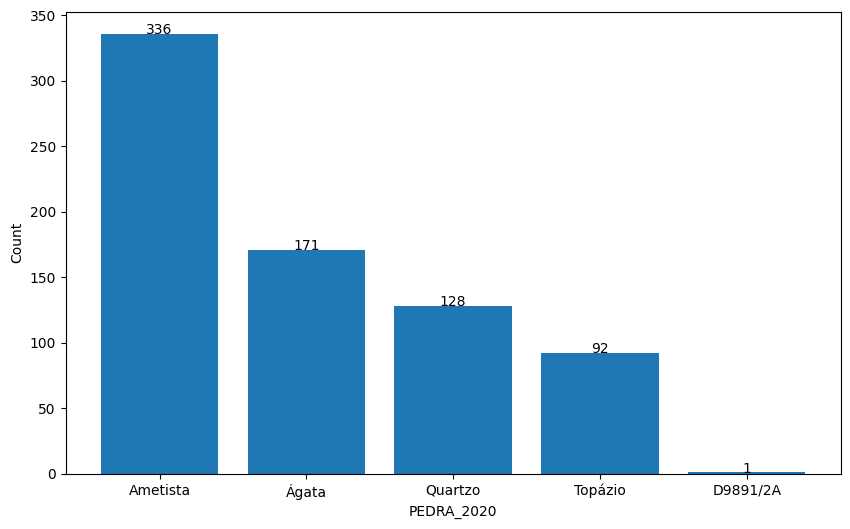

In [29]:
plot_exact_counter(size=(10, 6), x='PEDRA_2020', y=df_2020['PEDRA_2020'].value_counts(), df=df_2020)

## **Ideias** 🤔

* Predição de desempenho futuro e análise de outliers (*O que fez alguns alunos serem um dos melhores que já passou na Passos?*)
* Predição para recomendação de bolsas, intercambio, etc
* Análise comparatória de 2020, 2021 e 2022
* Análise de alunos (*de forma individual? 🤔*) ao longo dos anos (*Ex: temos dados do 'ALUNO 1' em 2020 e 2021, já em 2022 não temos dados... Seria talvez desistência?*)
* Análise de alunos que estão indo bem Vs alunos que não estão indo bem. Tentar entender o porquê um aluno vai bem e outro não.
* Tentar prever qual seria a “pedra” de um novo aluno com X pontuações de índices em uma nova entrada


## 2021

In [30]:
df_2021 = filter_columns(df, ['2020', '2022'])
df_2021 = cleaning_dataset(df_2021)
df_2021.head()

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0
2,ALUNO-3,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0
4,ALUNO-5,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0
7,ALUNO-8,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,7.1,8.0,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,8.5,10.0,Nível 5 (1o EM),0.0
10,ALUNO-11,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,8.8,7.7,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,9.7,10.0,Nível 1 (4o ano),0.0


In [31]:
df_2021['INSTITUICAO_ENSINO_ALUNO_2021'].value_counts()

INSTITUICAO_ENSINO_ALUNO_2021
Escola Pública    557
Rede Decisão      127
Escola JP II        2
Name: count, dtype: int64

## 2022

In [32]:
df_2022 = filter_columns(df, ['2020', '2021'])
df_2022 = cleaning_dataset(df_2022)
df_2022.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.00002,9.333333,7.5,5.500000,3.000000,8.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,9.314954,7.5,5.583333,4.666667,6.500000,NaN,2.0,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano)


In [33]:
#df_2022.to_csv("db_2022.csv", index=False)

In [34]:
# As informações são de 2022, mas confirmando se dizem respeito somente a quem entrou nesse ano ou outro cenário
df_2022["ANO_INGRESSO_2022"].unique()

array([2022., 2019., 2017., 2020., 2018., 2021., 2016.])

# **Tratativas extras e exportações realizadas pelo grupo**

A partir deste ponto serão feitas exportações (para se trabalhar em outros programas), tratativas extras dos dados e manuseios das consultas para facilitar as demais etapas e análises.

## **Exportando as tabelas**

As tabelas foram criadas e tratadas no Python, porém para trabalhar com sua projeção, visualização e elaboração de um dashboard, escolhemos por exportar os documentos em csv e abrí-los no Power BI, o que permitirá criar toda documentação que precisamos de maneira mais simples e dinâmica.

In [ ]:
# Primeiro vou reimprimir as tabelas aqui, ao menos o começo dela, para facilitar consultas enquanto desenvolvemos as próximas partes do código
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10
7,Rede Decisão/União,ALUNO-8,14,3,4L,Sim,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10


In [36]:
df_2021.head()

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0
2,ALUNO-3,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0
4,ALUNO-5,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0
7,ALUNO-8,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,7.1,8.0,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,8.5,10.0,Nível 5 (1o EM),0.0
10,ALUNO-11,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,8.8,7.7,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,9.7,10.0,Nível 1 (4o ano),0.0


In [37]:
df_2022.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.00002,9.333333,7.5,5.500000,3.000000,8.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,9.314954,7.5,5.583333,4.666667,6.500000,NaN,2.0,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano)


In [ ]:
# Confirmadas as tabelas alvos que quero exportar, irei agora extrair cada uma delas como um arquivo em csv, para eu consultá-las depois via BI

df_2020.to_csv("db_2020.csv", index = False)
df_2021.to_csv("db_2021.csv", index = False)
df_2022.to_csv("db_2022.csv", index = False)

# Para ver a orientação de como utilizá-las no BI, ver arquivo read_me.csv que será enviado junto ao pbix

## **Base de dados de alunos**

In [ ]:
# Enquanto trabalhavamos com os dados anteriormente exportados, dentro do Power BI, identificamos que havia a necessidade de se utilizar mais algumas
#bases auxiliares para elaborarmos os dashboards e nossas análises, portanto importamos a base de dados dos alunos e iniciamos as respectivas tratativas

file_path = 'D:\\Meus Arquivos\Pós\Data Analytics FIAP\Fase 5 - Redes neurais e deep learning\Tech Challenge - Datathon\DATATHON\Base de dados - Passos Mágicos\TbAluno\Originais anonimizados\TbAluno.csv'
pd.set_option('display.max_columns', None)
base_alunos = pd.read_csv(file_path, delimiter=',')

In [40]:
base_alunos.head()

,IdAluno,NomeAluno,NomeAbreviado,IdUnidade,Sexo,EstadoCivil,DataNascimento,IdPai,IdMae,IdResponsavel,IdTipoResponsavel,Naturalidade,Nacionalidade,TipoSangue,PlanoSaude,Alergia,Medicamento,IdEstabelecimentoEnsinoAnterior,IdReligiao,AnoConclusao,CorRaca,StDeficienciaCegueira,StDeficienciaBaixaVisao,StDeficienciaSurdez,StDeficienciaAuditiva,StDeficienciaFisica,StDeficienciaSurdoCegueira,StDeficienciaMultipla,StDeficienciaMental,_IdResponsavel_CadastroVinculado,StFalecido,EnsinoMedio_IdEstabelecimentoEnsino,EnsinoMedio_AnoConclusao,StDeficienciaAutismoInfantil,StDeficienciaSindromeAsperger,StDeficienciaSindromeRett,StDeficienciaTrastornoDesintegrativo,StDeficienciaAltasHabilidades,NomeCivil,StAppComunicacao_Sincronizado,IdTipoResponsavelPai,IdTipoResponsavelMae,StRecursoAuxilioLedor,StRecursoAuxilioTranscricao,StRecursoGuiaInterprete,StRecursoTradutorInterpreteDeLibras,StRecursoLeituraLabial,StRecursoMaterialDidaticoProvaBraille,StRecursoProvaAmpliada,StRecursoProvaSuperampliada,StRecursoCdComAudio,StRecursoLinguaPortuguesaSegundaLingua,StRecursoProvaEmVideo,StPermiteUsoImagem,StEstrangeiro,Unnamed: 55
0,3,Aluno 1,NaN,1.0,F,5.0,2005-03-29 03:00:00,NaN,5,5.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
1,4,Aluno 2,NaN,1.0,F,5.0,2004-11-04 02:00:00,6.0,NaN,6.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
2,5,Aluno 3,NaN,1.0,F,5.0,2002-01-25 02:00:00,NaN,NaN,7.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
3,6,Aluno 4,NaN,1.0,M,5.0,2002-10-07 03:00:00,NaN,8,8.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
4,7,Aluno 5,NaN,1.0,M,5.0,2002-12-23 02:00:00,NaN,9,9.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN


In [ ]:
# Caracterizando o tipo de informação nas colunas

base_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 56 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   IdAluno                                 2238 non-null   int64  
 1   NomeAluno                               2238 non-null   object 
 2   NomeAbreviado                           0 non-null      float64
 3   IdUnidade                               2237 non-null   float64
 4   Sexo                                    2237 non-null   object 
 5   EstadoCivil                             2237 non-null   float64
 6   DataNascimento                          2238 non-null   object 
 7   IdPai                                   800 non-null    float64
 8   IdMae                                   1218 non-null   object 
 9   IdResponsavel                           2237 non-null   float64
 10  IdTipoResponsavel                       2238 non-null   int6

In [ ]:
# Estatística básica das informações numéricas presentes na base de dados

base_alunos.describe()

,IdAluno,NomeAbreviado,IdUnidade,EstadoCivil,IdPai,IdResponsavel,IdTipoResponsavel,TipoSangue,PlanoSaude,Alergia,Medicamento,IdEstabelecimentoEnsinoAnterior,IdReligiao,AnoConclusao,EnsinoMedio_IdEstabelecimentoEnsino,NomeCivil,IdTipoResponsavelMae
count,2238.000000,0.0,2237.0,2237.000000,800.00000,2237.00000,2238.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,480.000000
mean,1130.315013,NaN,1.0,4.557443,1325.89250,855.88869,3.138070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.106250
std,654.486109,NaN,0.0,1.420504,382.61047,522.88275,14.478266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.306465
min,3.000000,NaN,1.0,0.000000,4.00000,4.00000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,563.250000,NaN,1.0,5.000000,1203.75000,392.00000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,1125.500000,NaN,1.0,5.000000,1408.50000,855.00000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
75%,1699.750000,NaN,1.0,5.000000,1595.25000,1323.00000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
max,2262.000000,NaN,1.0,5.000000,1770.00000,1770.00000,676.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000


In [ ]:
alunos = base_alunos

alunos.head()

,IdAluno,NomeAluno,NomeAbreviado,IdUnidade,Sexo,EstadoCivil,DataNascimento,IdPai,IdMae,IdResponsavel,IdTipoResponsavel,Naturalidade,Nacionalidade,TipoSangue,PlanoSaude,Alergia,Medicamento,IdEstabelecimentoEnsinoAnterior,IdReligiao,AnoConclusao,CorRaca,StDeficienciaCegueira,StDeficienciaBaixaVisao,StDeficienciaSurdez,StDeficienciaAuditiva,StDeficienciaFisica,StDeficienciaSurdoCegueira,StDeficienciaMultipla,StDeficienciaMental,_IdResponsavel_CadastroVinculado,StFalecido,EnsinoMedio_IdEstabelecimentoEnsino,EnsinoMedio_AnoConclusao,StDeficienciaAutismoInfantil,StDeficienciaSindromeAsperger,StDeficienciaSindromeRett,StDeficienciaTrastornoDesintegrativo,StDeficienciaAltasHabilidades,NomeCivil,StAppComunicacao_Sincronizado,IdTipoResponsavelPai,IdTipoResponsavelMae,StRecursoAuxilioLedor,StRecursoAuxilioTranscricao,StRecursoGuiaInterprete,StRecursoTradutorInterpreteDeLibras,StRecursoLeituraLabial,StRecursoMaterialDidaticoProvaBraille,StRecursoProvaAmpliada,StRecursoProvaSuperampliada,StRecursoCdComAudio,StRecursoLinguaPortuguesaSegundaLingua,StRecursoProvaEmVideo,StPermiteUsoImagem,StEstrangeiro,Unnamed: 55
0,3,Aluno 1,NaN,1.0,F,5.0,2005-03-29 03:00:00,NaN,5,5.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
1,4,Aluno 2,NaN,1.0,F,5.0,2004-11-04 02:00:00,6.0,NaN,6.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
2,5,Aluno 3,NaN,1.0,F,5.0,2002-01-25 02:00:00,NaN,NaN,7.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
3,6,Aluno 4,NaN,1.0,M,5.0,2002-10-07 03:00:00,NaN,8,8.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
4,7,Aluno 5,NaN,1.0,M,5.0,2002-12-23 02:00:00,NaN,9,9.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,False,False,False,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN


In [ ]:
# Devido ao grande número de colunas que há nessa tabela, puxamos os nomes delas numa lista para podermos avaliar o que realmente
#precisaremos de informação e que poderemos já remover ou tratar aqui na base


alunos.columns

Index(['IdAluno', 'NomeAluno', 'NomeAbreviado', 'IdUnidade', 'Sexo',
       'EstadoCivil', 'DataNascimento', 'IdPai', 'IdMae', 'IdResponsavel',
       'IdTipoResponsavel', 'Naturalidade', 'Nacionalidade', 'TipoSangue',
       'PlanoSaude', 'Alergia', 'Medicamento',
       'IdEstabelecimentoEnsinoAnterior', 'IdReligiao', 'AnoConclusao',
       'CorRaca', 'StDeficienciaCegueira', 'StDeficienciaBaixaVisao',
       'StDeficienciaSurdez', 'StDeficienciaAuditiva', 'StDeficienciaFisica',
       'StDeficienciaSurdoCegueira', 'StDeficienciaMultipla',
       'StDeficienciaMental', '_IdResponsavel_CadastroVinculado', 'StFalecido',
       'EnsinoMedio_IdEstabelecimentoEnsino', 'EnsinoMedio_AnoConclusao',
       'StDeficienciaAutismoInfantil', 'StDeficienciaSindromeAsperger',
       'StDeficienciaSindromeRett', 'StDeficienciaTrastornoDesintegrativo',
       'StDeficienciaAltasHabilidades', 'NomeCivil',
       'StAppComunicacao_Sincronizado', 'IdTipoResponsavelPai',
       'IdTipoResponsavelMae', 'S

In [ ]:
# Das informações presentes nessa base de dados, escolhemos trabalhar apenas com as colunas abaixo.
# Elas possuem maior taxa de preenchimento e permitirão orientarmos nossas análises considerando categorias comuns e relevantes

alunos = alunos[['IdAluno', 'NomeAluno','Sexo','DataNascimento',"CorRaca"]]
alunos.head()

,IdAluno,NomeAluno,Sexo,DataNascimento,CorRaca
0,3,Aluno 1,F,2005-03-29 03:00:00,R
1,4,Aluno 2,F,2004-11-04 02:00:00,B
2,5,Aluno 3,F,2002-01-25 02:00:00,B
3,6,Aluno 4,M,2002-10-07 03:00:00,R
4,7,Aluno 5,M,2002-12-23 02:00:00,R


In [ ]:
# Tendo em vista que um componente em comum entre todas as bases de dados são os alunos e o objetivo do grupo é realizar análises em função dos alunos,
#suas performances, características e afins, optamos por combinar as consultas em uma única tabela, unindo 2020-2021-2022 de forma a facilitar as
#projeções de gráficos e análises do dashboard.

# Para esse fim, a primeira etapa foi de garantir que haja 1 linha por ano para cada aluno, independente de se ele apresentou nota ou não no respectivo
#ano, pois esses valores em branco serão filtrados em outro momento tratando os dados

anos = [2020, 2021, 2022]

# Após criar a lista de anos, repliquei as linhas dos alunos para cada ano, assim garantindo que todas as datas estariam no dataframe
alunos_anos = alunos.loc[alunos.index.repeat(len(anos))]
alunos_anos["Ano"] = anos * len(alunos)

alunos_anos.head()

,IdAluno,NomeAluno,Sexo,DataNascimento,CorRaca,Ano
0,3,Aluno 1,F,2005-03-29 03:00:00,R,2020
0,3,Aluno 1,F,2005-03-29 03:00:00,R,2021
0,3,Aluno 1,F,2005-03-29 03:00:00,R,2022
1,4,Aluno 2,F,2004-11-04 02:00:00,B,2020
1,4,Aluno 2,F,2004-11-04 02:00:00,B,2021


In [ ]:
# O intuito é combinar as tabelas, mas para isso preciso garantir que haja um campo em comum (mesma escrita e formato de texto) para usar de referência
#e buscar a informação nas outras tabelas, então foi criada uma coluna nome_id contendo o termo aluno, seu número e o ano da linha, tudo sem espaçamento,
#separado por - e em letras minúsculas

alunos_anos["nome_id"] = alunos_anos["NomeAluno"].str.lower().str.replace(" ", "-").str.cat(alunos_anos["Ano"].astype(str),sep="-")
alunos_anos.head()

,IdAluno,NomeAluno,Sexo,DataNascimento,CorRaca,Ano,nome_id
0,3,Aluno 1,F,2005-03-29 03:00:00,R,2020,aluno-1-2020
0,3,Aluno 1,F,2005-03-29 03:00:00,R,2021,aluno-1-2021
0,3,Aluno 1,F,2005-03-29 03:00:00,R,2022,aluno-1-2022
1,4,Aluno 2,F,2004-11-04 02:00:00,B,2020,aluno-2-2020
1,4,Aluno 2,F,2004-11-04 02:00:00,B,2021,aluno-2-2021


In [ ]:
# Com o "índice" já criado no que será minha tabela principal, preciso garantir que o mesmo padrão de nome seja seguido nas tabelas secundárias,
#logo, seguimos a mesma lógica para garantir que haja colunas correspondentes nos df_ano que havíamos criado anteriormente com auxílio do código
#da FIAP

df_2020_ano = df_2020
df_2020_ano["FASE_2020"] = df_2020_ano["FASE_TURMA_2020"].str[0]
df_2020_ano["ano"] = 2020
df_2020_ano["nome_id"] = df_2020_ano["NOME"].str.lower().str.replace(" ", "-") + "-2020"

df_2021_ano = df_2021
df_2021_ano["ano"] = 2021
df_2021_ano["nome_id"] = df_2021_ano["NOME"].str.lower().str.replace(" ", "-") + "-2021"

df_2022_ano = df_2022
df_2022_ano["ano"] = 2022
df_2022_ano["nome_id"] = df_2022_ano["NOME"].str.lower().str.replace(" ", "-") + "-2022"

In [ ]:
# Utilizando as colunas índices, as tabelas foram mescladas

alunos_completo = alunos_anos.merge(df_2020_ano.assign(Ano = 2020), on=["nome_id"], how="left")
alunos_completo = alunos_completo.merge(df_2021_ano.assign(Ano_x = 2021), on=["nome_id"], how="left")
alunos_completo = alunos_completo.merge(df_2022_ano.assign(Ano_x_x = 2022), on=["nome_id"], how="left")
alunos_completo.head()

,IdAluno,NomeAluno,Sexo,DataNascimento,CorRaca,Ano_x_x_x,nome_id,INSTITUICAO_ENSINO_ALUNO_2020,NOME_x,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2020,ano_x,Ano_y,NOME_y,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,ano_y,Ano_x_y,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022,ano,Ano_x_x_y
0,3,Aluno 1,F,2005-03-29 03:00:00,R,2020,aluno-1-2020,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2,2020.0,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,Aluno 1,F,2005-03-29 03:00:00,R,2021,aluno-1-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,2021.0,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Aluno 1,F,2005-03-29 03:00:00,R,2022,aluno-1-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Aluno 2,F,2004-11-04 02:00:00,B,2020,aluno-2-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Aluno 2,F,2004-11-04 02:00:00,B,2021,aluno-2-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# O conjunto de dados ficou com uma lista consideravelmente grande de nomes, então eles foram listados na lista abaixo de forma a facilitar a identificação
#do que iremos querer trabalhar com e podermos excluir as outras colunas desnecessárias

alunos_completo.columns

Index(['IdAluno', 'NomeAluno', 'Sexo', 'DataNascimento', 'CorRaca',
       'Ano_x_x_x', 'nome_id', 'INSTITUICAO_ENSINO_ALUNO_2020', 'NOME_x',
       'IDADE_ALUNO_2020', 'ANOS_PM_2020', 'FASE_TURMA_2020',
       'PONTO_VIRADA_2020', 'INDE_2020', 'INDE_CONCEITO_2020', 'PEDRA_2020',
       'DESTAQUE_IEG_2020', 'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020',
       'IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020',
       'IAN_2020', 'FASE_2020', 'ano_x', 'Ano_y', 'NOME_y', 'FASE_2021',
       'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021', 'ano_y', 'Ano_x_y', 'NOME', 'FASE_2022', 'TURMA_2022',
       'ANO_INGRESSO_2022', 'BOLSISTA_2022', 'INDE_2022', 'CG_2022'

In [ ]:
# Identificando as colunas chave que serão usadas para analisar o conjunto, criamos novas colunas na base em que compactaríamos as informações de todos
#os anos nas mesmas colunas, realizando o mesmo processo para cada critério mesclando seus conteúdos pelos correspondentes anos, nomes, etc

alunos_completo["Fase"] = alunos_completo["FASE_2020"].combine_first(alunos_completo["FASE_2021"].combine_first(alunos_completo["FASE_2022"]))

alunos_completo["Pedra"] = alunos_completo["PEDRA_2020"].combine_first(alunos_completo["PEDRA_2021"].combine_first(alunos_completo["PEDRA_2022"]))

alunos_completo["IAA"] = alunos_completo["IAA_2020"].combine_first(alunos_completo["IAA_2021"].combine_first(alunos_completo["IAA_2022"]))

alunos_completo["IAN"] = alunos_completo["IAN_2020"].combine_first(alunos_completo["IAN_2021"].combine_first(alunos_completo["IAN_2022"]))

alunos_completo["IDA"] = alunos_completo["IDA_2020"].combine_first(alunos_completo["IDA_2021"].combine_first(alunos_completo["IDA_2022"]))

alunos_completo["IEG"] = alunos_completo["IEG_2020"].combine_first(alunos_completo["IEG_2021"].combine_first(alunos_completo["IEG_2022"]))

alunos_completo["INDE"] = alunos_completo["INDE_2020"].combine_first(alunos_completo["INDE_2021"].combine_first(alunos_completo["INDE_2022"]))

alunos_completo["IPP"] = alunos_completo["IPP_2020"].combine_first(alunos_completo["IPP_2021"].combine_first(alunos_completo["IPP_2022"]))

alunos_completo["IPS"] = alunos_completo["IPS_2020"].combine_first(alunos_completo["IPS_2021"].combine_first(alunos_completo["IPS_2022"]))

alunos_completo["IPV"] = alunos_completo["IPV_2020"].combine_first(alunos_completo["IPV_2021"].combine_first(alunos_completo["IPV_2022"]))



In [ ]:
# Para isolar essas colunas novas criadas no conteudo de interesse para trabalho, foi criado um novo dataframe para continuar a ser editado, sem perder
#nenhuma informação

alunos_merged = alunos_completo[['IdAluno', 'NomeAluno', 'Sexo', 'DataNascimento', 'CorRaca', 'Ano_x_x_x','nome_id', "Fase","Pedra","IAA","IAN","IDA","IEG","INDE","IPP","IPS","IPV"]]

In [ ]:
# Foi corrigido o nome da coluna Ano por um nome mais intuitivo e exibida a tabela para confirmar o resultado

alunos_merged.rename(columns={"Ano_x_x_x":"Ano"}, inplace=True)
alunos_merged.head()

C:\Users\edson\AppData\Local\Temp\ipykernel_28544\3312125531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alunos_merged.rename(columns={"Ano_x_x_x":"Ano"}, inplace=True)


,IdAluno,NomeAluno,Sexo,DataNascimento,CorRaca,Ano,nome_id,Fase,Pedra,IAA,IAN,IDA,IEG,INDE,IPP,IPS,IPV
0,3,Aluno 1,F,2005-03-29 03:00:00,R,2020,aluno-1-2020,2,Ametista,8.500020000000001,10,7,8.7,7.883752,5.9375,7.5,7.75
1,3,Aluno 1,F,2005-03-29 03:00:00,R,2021,aluno-1-2021,2.0,Ametista,7.5,5.0,8.8,6.3,7.319,7.7,6.9,8.1
2,3,Aluno 1,F,2005-03-29 03:00:00,R,2022,aluno-1-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Aluno 2,F,2004-11-04 02:00:00,B,2020,aluno-2-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Aluno 2,F,2004-11-04 02:00:00,B,2021,aluno-2-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Como a base final atingiu o desejado, essa base foi extraída para ser importada no power BI posteriormente e ser trabalhada na query, de lá, para
#para gerar as exibições desejadas

alunos_merged.to_csv("alunos_merged.csv", index = False)